<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_7_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Dataset with brain atlas A**: use the Oasis dataset for classification of male and female individuals based on brain scans.

``Task 1:`` Use **LogisticRegression(penalty= ’l2’, C=1.0)** to fit separate classification models based on **100 brain regions of interest** (n_rois=100). Perform dimensionality reduction on the training split via a) `k-means clustering` (n_clusters), b) `GMMs` (n_clusters), c) `PCA` (n_components), and d) `ICA` (n_components) to transform the original 100 input variables into `k=1,2,3,…,10` latent pattern projections. Next, evaluate each fitted LogReg model on
the unseen structural brain scans and retrieve ``classification accuracy``. Do this prediction problem based on using **5-fold (KFold) cross-validation**. Plot the classification accuracy on the test set vs k (k on the x-axis, test classification accuracy on the y axis; one line for each
of the 4 dimensionality reduction methods).

In [ ]:
!pip install nilearn

In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score

In [ ]:
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(100)) # We iterate through the number of ROIs
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males


Dataset created in /root/nilearn_data/oasis1



Downloaded 897851392 of 905208634 bytes (99.2%,    0.5s remaining) ...done. (58 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


In [ ]:
# We prepare the model with the required parameters 
logreg = LogisticRegression(max_iter=1e5, penalty = 'l2', C = 1, solver = 'saga')

# We prepare the iterating variable 
k_list = list(range(1,11))

In [ ]:
kMM_scores = []
gmm_scores = []
pca_scores = []
ica_scores = []

In [ ]:
for i in k_list:
      X, y = input_variables, output_variable
      X = scaler.fit_transform(X)

      kMM = KMeans(n_clusters=i).fit(X)
      X_kMM = kMM.transform(X)
      scores1 = cross_val_score(logreg, X_kMM, y, cv=5)
      scores1 = np.multiply(scores1, 100) 
      kMM_scores.append(scores1) # We store the scores

      gmm = GaussianMixture(n_components=i).fit(X)
      gmm_X = gmm.predict_proba(X)      
      scores2 = cross_val_score(logreg, gmm_X, y, cv=5)
      scores2 = np.multiply(scores2, 100) 
      gmm_scores.append(scores2) # We store the scores

      pca = PCA(n_components=i).fit(X)
      X_pca = pca.transform(X)
      scores3 = cross_val_score(logreg, X_pca, y, cv=5)
      scores3 = np.multiply(scores3, 100) 
      pca_scores.append(scores3) # We store the scores

      ica = FastICA(n_components=i,tol=0.01).fit(X)
      X_ica = ica.transform(X)
      scores4 = cross_val_score(logreg, X_ica, y, cv=5)
      scores4 = np.multiply(scores4, 100) 
      ica_scores.append(scores4) # We store the scores

In [ ]:
mean_scores1 = mean(kMM_scores,axis=1)
mean_scores2 = mean(gmm_scores,axis=1)
mean_scores3 = mean(pca_scores,axis=1)
mean_scores4 = mean(ica_scores,axis=1)

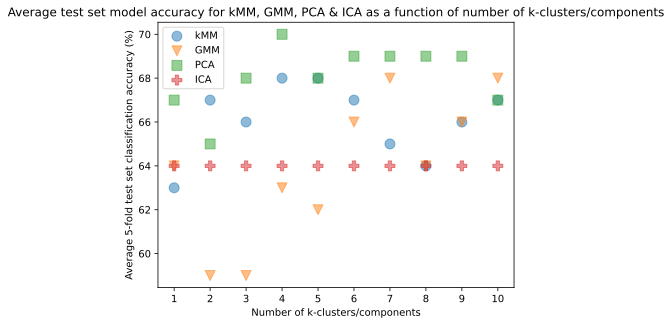

In [ ]:
lab = ['kMM', 'GMM', 'PCA', 'ICA']
plt.style.use("default")
plt.scatter(k_list,mean_scores1, s=100, alpha = 0.5, marker= "o")
plt.scatter(k_list,mean_scores2, s=100, alpha = 0.5, marker= "v")
plt.scatter(k_list,mean_scores3, s=100, alpha = 0.5, marker= "s")
plt.scatter(k_list,mean_scores4, s=100, alpha = 0.5, marker= "P")
plt.legend(labels=(lab))
plt.gca().set(
    title="Average test set model accuracy for kMM, GMM, PCA & ICA as a function of number of k-clusters/components",
    xlabel="Number of k-clusters/components",
    ylabel="Average 5-fold test set classification accuracy (%)",
    xticks = (k_list)
)
plt.show()